#### Perform clustering (Hierarchical, K-means clustering and DBSCAN) for the Crime data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings('ignore')

## Hierarchical Clustering

In [2]:
df = pd.read_csv("D:\\Data Science\\Data Science Assignment\\Clustering\\crime_data.csv", encoding='latin-1')
df

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


### EDA and Visualization

In [3]:
df.rename(columns={'Unnamed: 0':'State' }, inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [6]:
df.isna().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

### Scaling down the data

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [8]:
x = pd.DataFrame(sc.fit_transform(df.iloc[:,1: ]), columns=df.iloc[:,1: ].columns)
x

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


### Finding optimal number of clusters using dendograms

In [9]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x, method='complete')

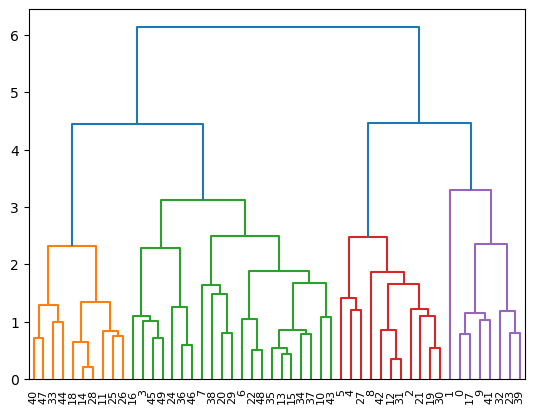

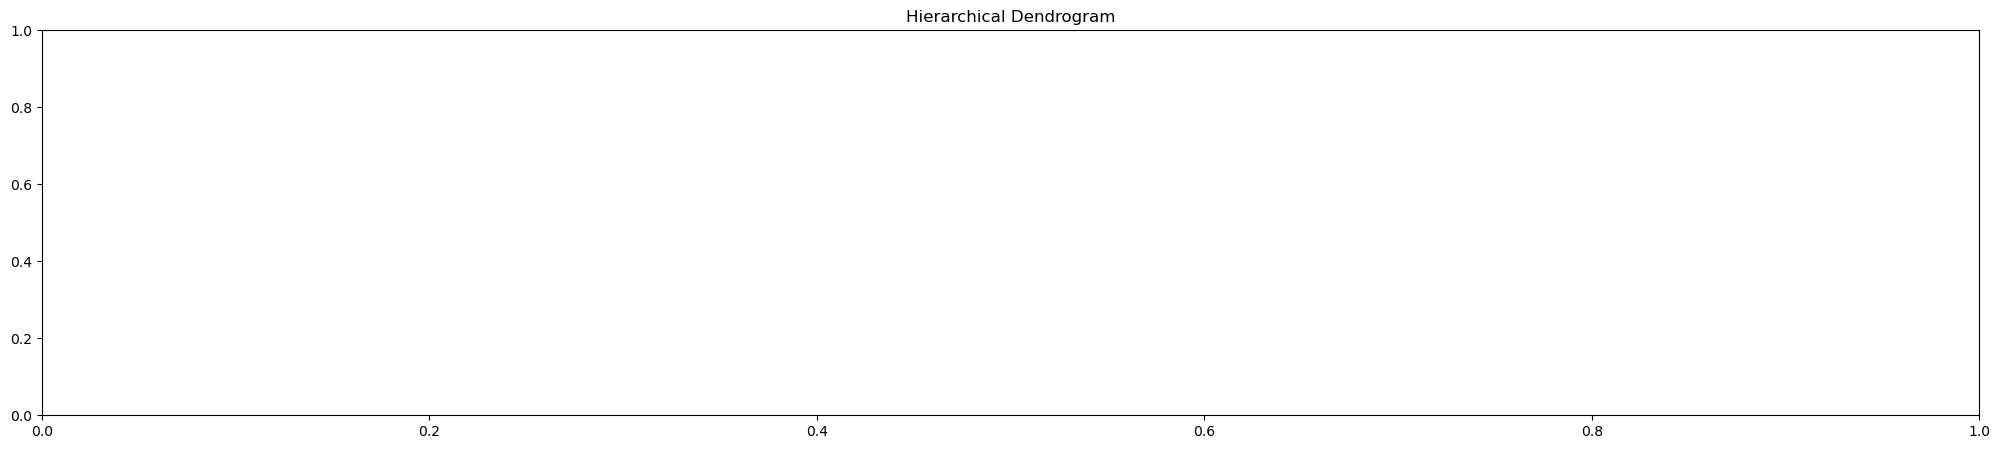

In [10]:
dendrogram = hierarchy.dendrogram(lk)
plt.figure(figsize = (25,5))
plt.title('Hierarchical Dendrogram')
plt.show()

### Model Building

In [11]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4)

In [12]:
ylabel = hc.fit_predict(x)
ylabel

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [13]:
df['Cluster'] = ylabel
df

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [14]:
df.groupby('Cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,6.210526,142.052632,71.263158,19.184211
1,10.966667,264.000000,76.500000,33.608333
2,3.091667,76.000000,52.083333,11.833333
3,14.671429,251.285714,54.285714,21.685714


### Visualizing the clusters

In [15]:
df[df['Cluster']==3] 

,State,Murder,Assault,UrbanPop,Rape,Cluster
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


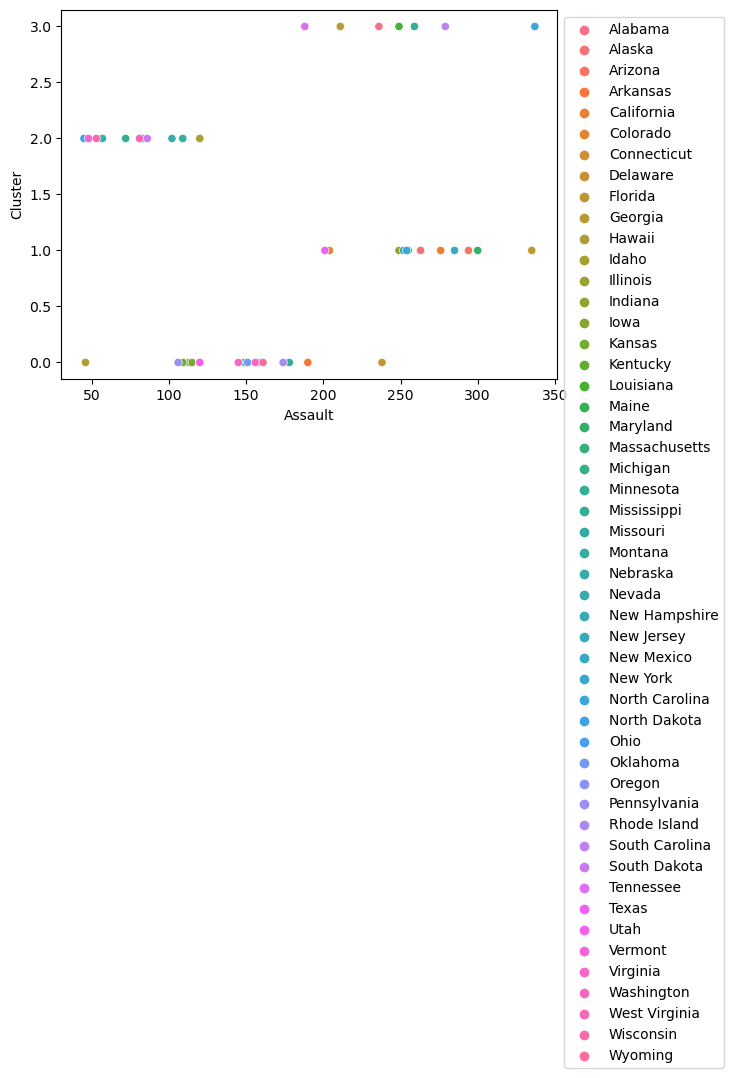

In [17]:
sns.scatterplot(data=df, x='Assault', y='Cluster', hue = 'State')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

## K-means Clustering

### Basic Model

In [18]:
from sklearn.cluster import KMeans
km = KMeans()

In [19]:
cluster2 = km.fit_predict(x)
cluster2

array([6, 7, 4, 1, 4, 4, 5, 5, 0, 6, 5, 2, 0, 1, 2, 1, 1, 6, 2, 0, 5, 4,
       2, 3, 0, 1, 1, 4, 2, 5, 0, 0, 3, 2, 1, 1, 1, 1, 5, 3, 2, 6, 0, 5,
       2, 1, 1, 2, 2, 1])

### Finding optimal number of clusters using Elbow Graph

In [20]:
wcss2 = []

for i in range (1,20):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss2.append(km.inertia_)

In [21]:
wcss2

[199.99999999999997,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 49.94594570974446,
 44.29065090781911,
 41.42201705166716,
 34.76592638022921,
 31.25279877872406,
 28.340453830490436,
 27.408333625394825,
 22.448038722150663,
 21.04520217877443,
 19.08020185570107,
 18.29254704516934,
 17.140204169183733,
 16.074157557631334,
 15.59948082870802,
 14.016086370216744]

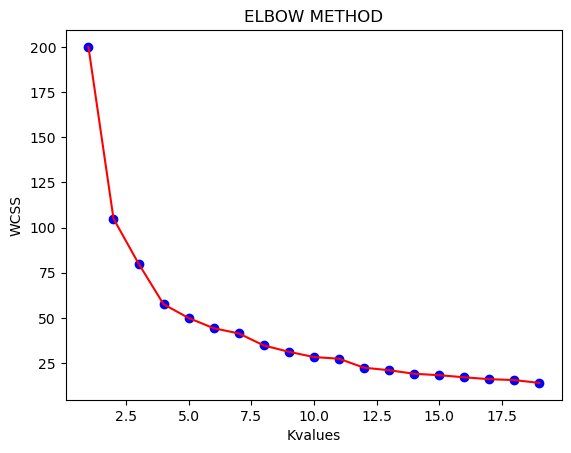

In [22]:
plt.plot(range(1,20), wcss2, color = 'Red')
plt.scatter(range(1,20), wcss2, color = 'Blue')
plt.title('ELBOW METHOD')
plt.xlabel('Kvalues')
plt.ylabel('WCSS')
plt.show()

### Revised Model

In [23]:
# k-value = 6
km = KMeans(n_clusters=4)
ylabel2 = km.fit_predict(x)
ylabel2

array([1, 2, 2, 1, 2, 2, 3, 3, 2, 1, 3, 0, 2, 3, 0, 3, 0, 1, 0, 2, 3, 2,
       0, 1, 2, 0, 0, 2, 0, 3, 2, 2, 1, 0, 3, 3, 3, 3, 3, 1, 0, 1, 2, 3,
       0, 3, 3, 0, 0, 3])

In [24]:
df['Cluster2'] = ylabel2
df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster,Cluster2
0,Alabama,13.2,236,58,21.2,3,1
1,Alaska,10.0,263,48,44.5,1,2
2,Arizona,8.1,294,80,31.0,1,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,1,2


### Visualizing the clusters

In [25]:
df[df['Cluster2']==3]

,State,Murder,Assault,UrbanPop,Rape,Cluster,Cluster2
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
10,Hawaii,5.3,46,83,20.2,0,3
13,Indiana,7.2,113,65,21.0,0,3
15,Kansas,6.0,115,66,18.0,0,3
20,Massachusetts,4.4,149,85,16.3,0,3
29,New Jersey,7.4,159,89,18.8,0,3
34,Ohio,7.3,120,75,21.4,0,3
35,Oklahoma,6.6,151,68,20.0,0,3
36,Oregon,4.9,159,67,29.3,0,3


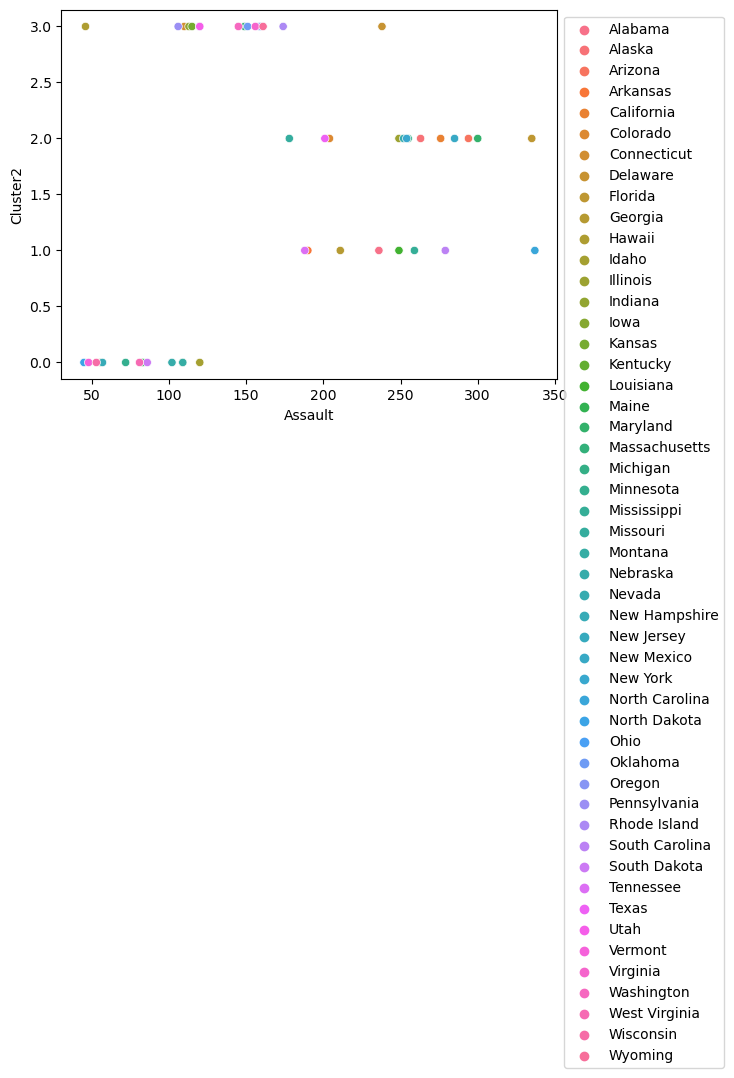

In [29]:
sns.scatterplot(data=df, x='Assault', y='Cluster2', hue = 'State')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

## DBSCAN

### Model Building

In [30]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 1,min_samples = 4)

In [31]:
db.fit(x)

DBSCAN(eps=1, min_samples=4)

In [32]:
db.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [33]:
df['Cluster3'] = db.labels_
df.head()

,State,Murder,Assault,UrbanPop,Rape,Cluster,Cluster2,Cluster3
0,Alabama,13.2,236,58,21.2,3,1,0
1,Alaska,10.0,263,48,44.5,1,2,-1
2,Arizona,8.1,294,80,31.0,1,2,-1
3,Arkansas,8.8,190,50,19.5,0,1,-1
4,California,9.0,276,91,40.6,1,2,-1


In [34]:
df.Cluster3.value_counts()

 1    28
-1    18
 0     4
Name: Cluster3, dtype: int64

### Visualizing the clusters

In [35]:
df[df['Cluster3']==1]

,State,Murder,Assault,UrbanPop,Rape,Cluster,Cluster2,Cluster3
6,Connecticut,3.3,110,77,11.1,0,3,1
11,Idaho,2.6,120,54,14.2,2,0,1
13,Indiana,7.2,113,65,21.0,0,3,1
14,Iowa,2.2,56,57,11.3,2,0,1
15,Kansas,6.0,115,66,18.0,0,3,1
16,Kentucky,9.7,109,52,16.3,0,0,1
18,Maine,2.1,83,51,7.8,2,0,1
20,Massachusetts,4.4,149,85,16.3,0,3,1
22,Minnesota,2.7,72,66,14.9,2,0,1
24,Missouri,9.0,178,70,28.2,0,2,1


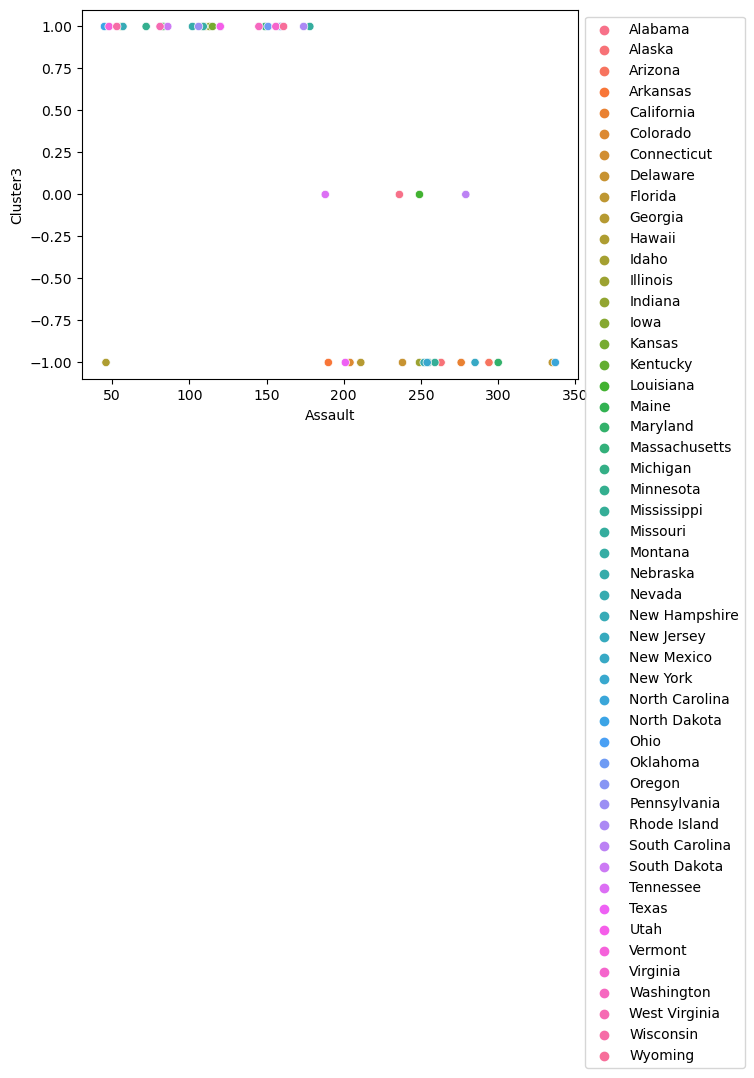

In [36]:
sns.scatterplot(data=df, x='Assault', y='Cluster3', hue = 'State')
plt.legend(bbox_to_anchor = (1,1))
plt.show()

#### Conclusion:

1.After performing the Clustering of the Airlines data, we find the models that have better clustering ability is DBSCAN > KMeans > Hierarchical.

2.The no. of clusters for for the models are - Hierarchical : 4, KMeans : 4, DBSCAN : 3

### End